# Generating and Fitting a Geometric Brownian Motion

This notebook provides a step-by-step guide to generating a simple Geometric Brownian Motion (GBM) simulation, fitting the simulated data using the GBM model. Geometric Brownian Motion is widely used in finance to model asset prices due to its properties of log-normal distribution and continuous time stochastic processes.

In [6]:
import matplotlib.pyplot as plt
from stochax import GeometricBrownianMotion

<Axes: >

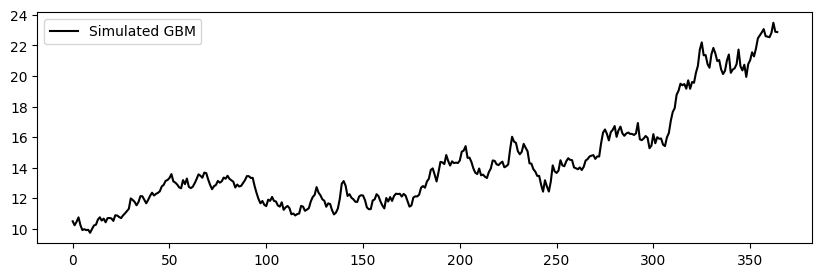

In [7]:
gbm = GeometricBrownianMotion(mu=1.0, sigma=0.5, rng=42)
dt = 1 / 365
initial_value = 10.5
n_steps = 364

data = gbm.simulate(initial_value=initial_value, n_steps=n_steps, delta=dt)
data.columns = ['Simulated GBM']
data.plot(figsize=(10, 3), color='black')

In [8]:
res = gbm.calibrate(data, method="mle", delta=dt)
res

CalibrationResult(GeometricBrownianMotion(mu=0.8895995468927514, sigma=0.47065000323010625), observations.shape=(365, 1))

In [9]:
simulations = gbm.simulate(
    initial_value=initial_value, 
    n_steps=n_steps, 
    delta=dt, 
    n_simulations=1000
)

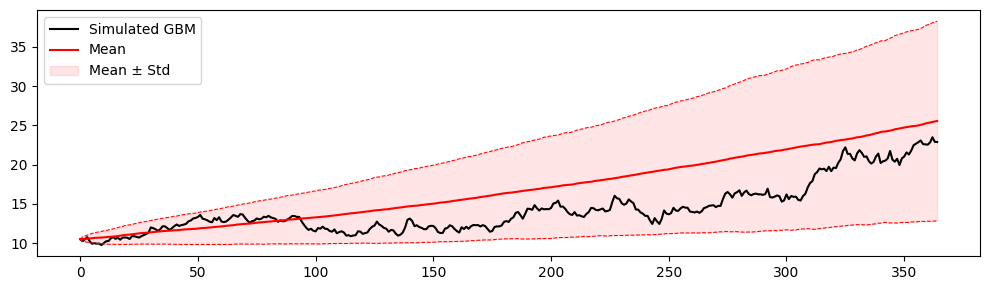

In [10]:
m = simulations.mean(axis=1)
s = simulations.std(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
data.plot(color='black', ax=ax)
m.plot(color='red', ax=ax, label='Mean')
(m + s).plot(color='red', linestyle='dashed', linewidth=0.75)
(m - s).plot(color='red', linestyle='dashed', linewidth=0.75)
ax.fill_between(m.index, m+s, m-s, color='red', alpha=0.1, label='Mean ± Std')
ax.legend()
fig.tight_layout()